# Customer Churn Analysis
Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models

In [1]:
## Importing Important Libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/ASUS/Desktop/PROJECT/csv files/DSData-master/DSData-master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Removing Useless data
data = data.drop('customerID', axis=1)

In [5]:
#all the data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ': ' +str())
        print(data[column].value_counts())
        print('\n')

gender: 
Male      3555
Female    3488
Name: gender, dtype: int64


Partner: 
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents: 
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService: 
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines: 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService: 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity: 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup: 
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


DeviceProtection: 
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


TechSupport: 
No                     3473
Yes                    20

In [6]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

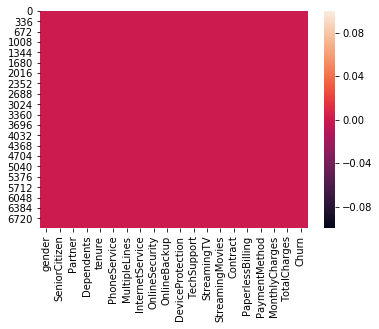

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [10]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                                                'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [12]:
#all the data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ': ' +str())
        print(data[column].value_counts())
        print('\n')

gender: 
Male      3555
Female    3488
Name: gender, dtype: int64


Partner: 
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents: 
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService: 
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines: 
No     4072
Yes    2971
Name: MultipleLines, dtype: int64


InternetService: 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity: 
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


OnlineBackup: 
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


DeviceProtection: 
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


TechSupport: 
No     4999
Yes    2044
Name: TechSupport, dtype: int64


StreamingTV: 
No     4336
Yes    2707
Name: StreamingTV, dtype: int64


StreamingMovies: 
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


Contract: 
Month-to-month    3875
Two year          1695
One year         

In [13]:
data.shape

(7043, 20)

In [14]:
# Check the descriptive statistics of numeric variables
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
# percentage of customers 
num_retain = data[data.Churn == 'No'].shape[0]
num_churn = data[data.Churn == 'Yes'].shape[0]

print(num_retain/(num_retain+num_churn)*100,'% of custermer stayed')
print(num_churn/(num_retain+num_churn)*100,'% of custermer left')

73.4630129206304 % of custermer stayed
26.536987079369588 % of custermer left


Data is highly imbalanced, ratio = 73:27

So we analyse the data with other features while taking the target values separately.

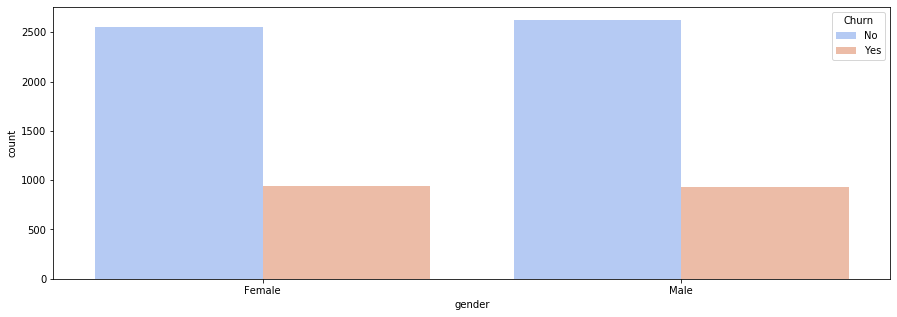

In [16]:
# Visualize the churn count wrt gender
plt.figure(figsize= (15,5))
sns.countplot(data['gender'], palette='coolwarm', hue='Churn', data=data)

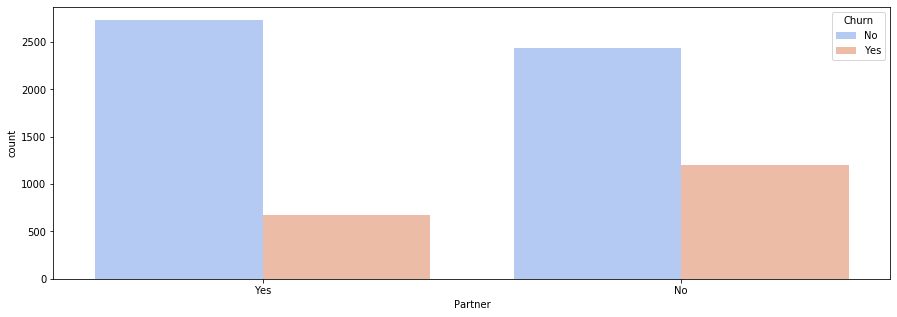

In [17]:
# Visualize the churn count wrt Partner
plt.figure(figsize= (15,5))
sns.countplot(data['Partner'], palette='coolwarm', hue='Churn', data=data)

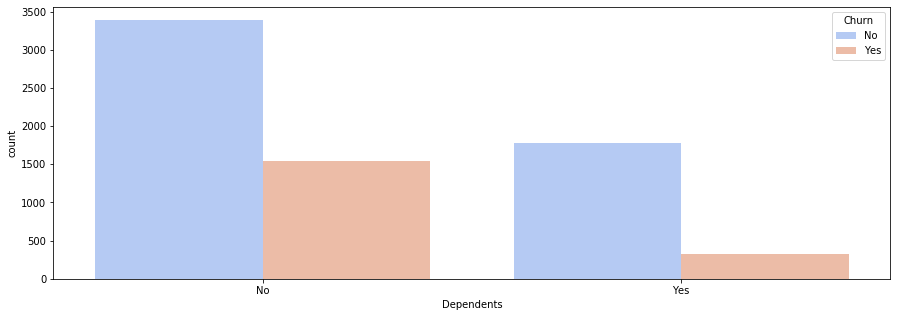

In [18]:
# Visualize the churn count wrt Dependents
plt.figure(figsize= (15,5))
sns.countplot(data['Dependents'], palette='coolwarm', hue='Churn', data=data)

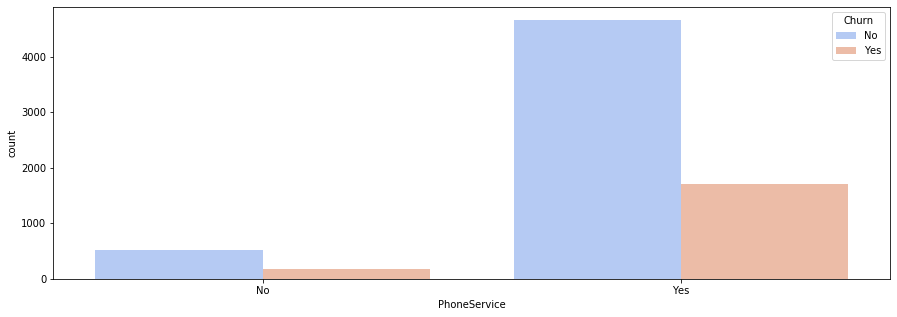

In [19]:
# Visualize the churn count wrt PhoneService
plt.figure(figsize= (15,5))
sns.countplot(data['PhoneService'], palette='coolwarm', hue='Churn', data=data)

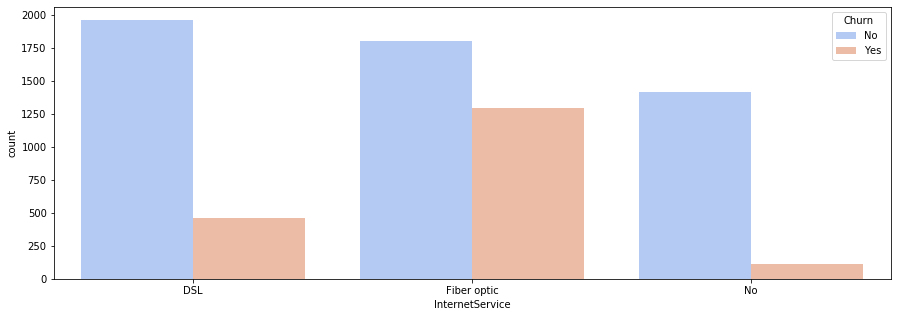

In [20]:
# Visualize the churn count wrt InternetService
plt.figure(figsize= (15,5))
sns.countplot(data['InternetService'], palette='coolwarm', hue='Churn', data=data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019269C919B0>,
      dtype=object)

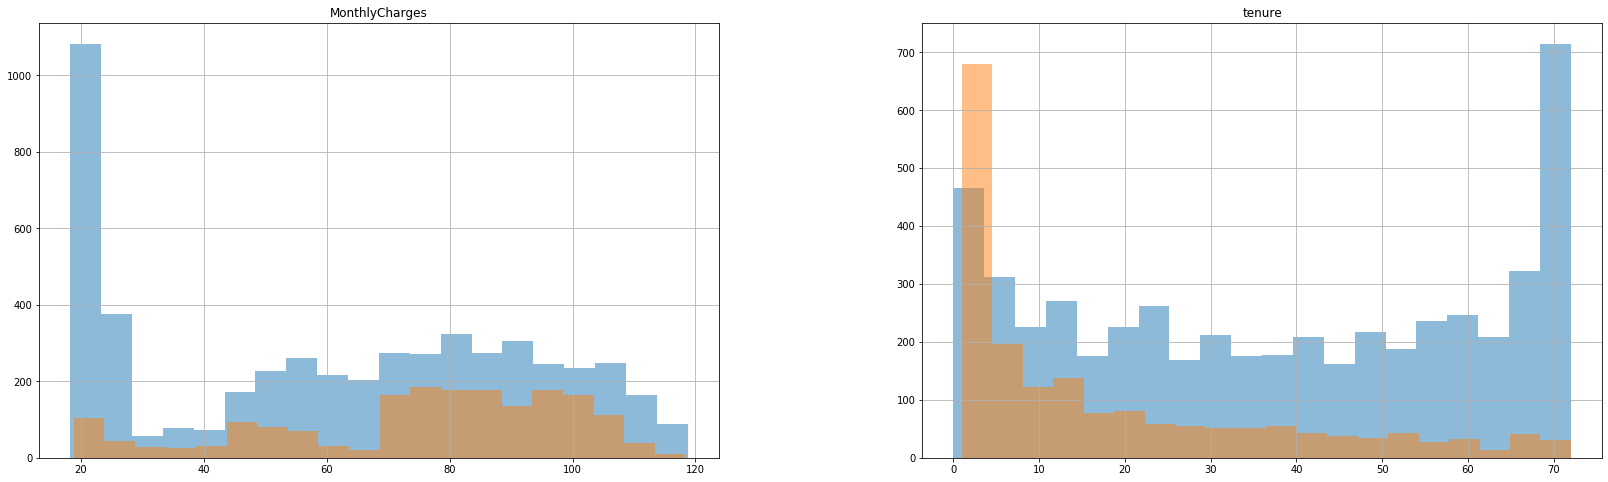

In [21]:
num_features = ['tenure','MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28,8))
data[data.Churn == 'No'][num_features].hist(bins=20, alpha=0.5, ax=ax )
data[data.Churn == 'Yes'][num_features].hist(bins=20, alpha=0.5, ax=ax )

In [22]:
# Converting catagorical features into numeric using Label Encording
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [25]:
# seprating the features and label columns
X = data.drop(columns=['Churn'], axis=1)
y = data['Churn']

In [26]:
# Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

In [27]:
# As the data points differ a lot in magnitude we'll Scale them using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Model Building

In [28]:
#Using Logistic Regression 
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 80.26502602934217
Cross validation is 80.16227180527385


In [29]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
print("Accuracy is", knn.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(knn, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 76.10033128253669
Cross validation is 75.7606490872211


In [30]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(x_train,y_train)
print("Accuracy is", gauss.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(gauss, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 75.24846190250828
Cross validation is 75.74036511156187


In [31]:
#Using Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
print("Accuracy is", tree.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(tree, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 71.50970184571699
Cross validation is 72.67748478701826


In [32]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(x_train,y_train)
print("Accuracy is", forest.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(forest, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 77.99337434926645
Cross validation is 78.88438133874239


As there is very less diffrence between Accuracy and Cross Validation score in Logistic Regression,
we select it for Hyperparameter Tuning.

# Hyperparameter Tuning

In [33]:
#Tuning hyperparameters now, by passing the diffrent values for both parameters

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [34]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [35]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [36]:
#Lets see the best parameter as per the our grid search
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga')

In [37]:
lr = LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga')
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)

Accuracy is 80.31235210601041


# Confusion Matrix

In [38]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1393,  157],
       [ 259,  304]], dtype=int64)

# Model Saving

In [39]:
import joblib
joblib.dump(lr,"FinalModel.pkl")

['FinalModel.pkl']